In [ ]:
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
from reproject import reproject_interp
from astropy.wcs import WCS
from matplotlib.colors import LinearSegmentedColormap
from astropy.visualization import simple_norm
import numpy as np
from matplotlib.patches import Rectangle
from regions import Regions
from astropy.nddata import Cutout2D

filter_subtraction_path = '/orange/adamginsburg/jwst/w51/filter_subtractions'
f335_f2100_ratio = fits.open(f'{filter_subtraction_path}/f335_f2100_ratio.fits')[0]
f405_minus_f410 = fits.open(f'{filter_subtraction_path}/f405n_minus_f410m.fits')[0]
f480_minus_f360 = fits.open(f'{filter_subtraction_path}/f480m_minus_f360m_unscaled.fits')[0]
f335_f480_ratio = fits.open(f'{filter_subtraction_path}/f335_f480_ratio.fits')[0]
f335_f2100_ratio_reproj, _ = reproject_interp((f335_f2100_ratio.data.squeeze(), WCS(f335_f2100_ratio.header, naxis=2)), WCS(f480_minus_f360.header, naxis=2), shape_out=f480_minus_f360.data.shape)
f405_minus_f410_reproj, _ = reproject_interp((f405_minus_f410.data.squeeze(), WCS(f405_minus_f410.header, naxis=2)), WCS(f480_minus_f360.header, naxis=2), shape_out=f480_minus_f360.data.shape)


Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


1224.4807023084447


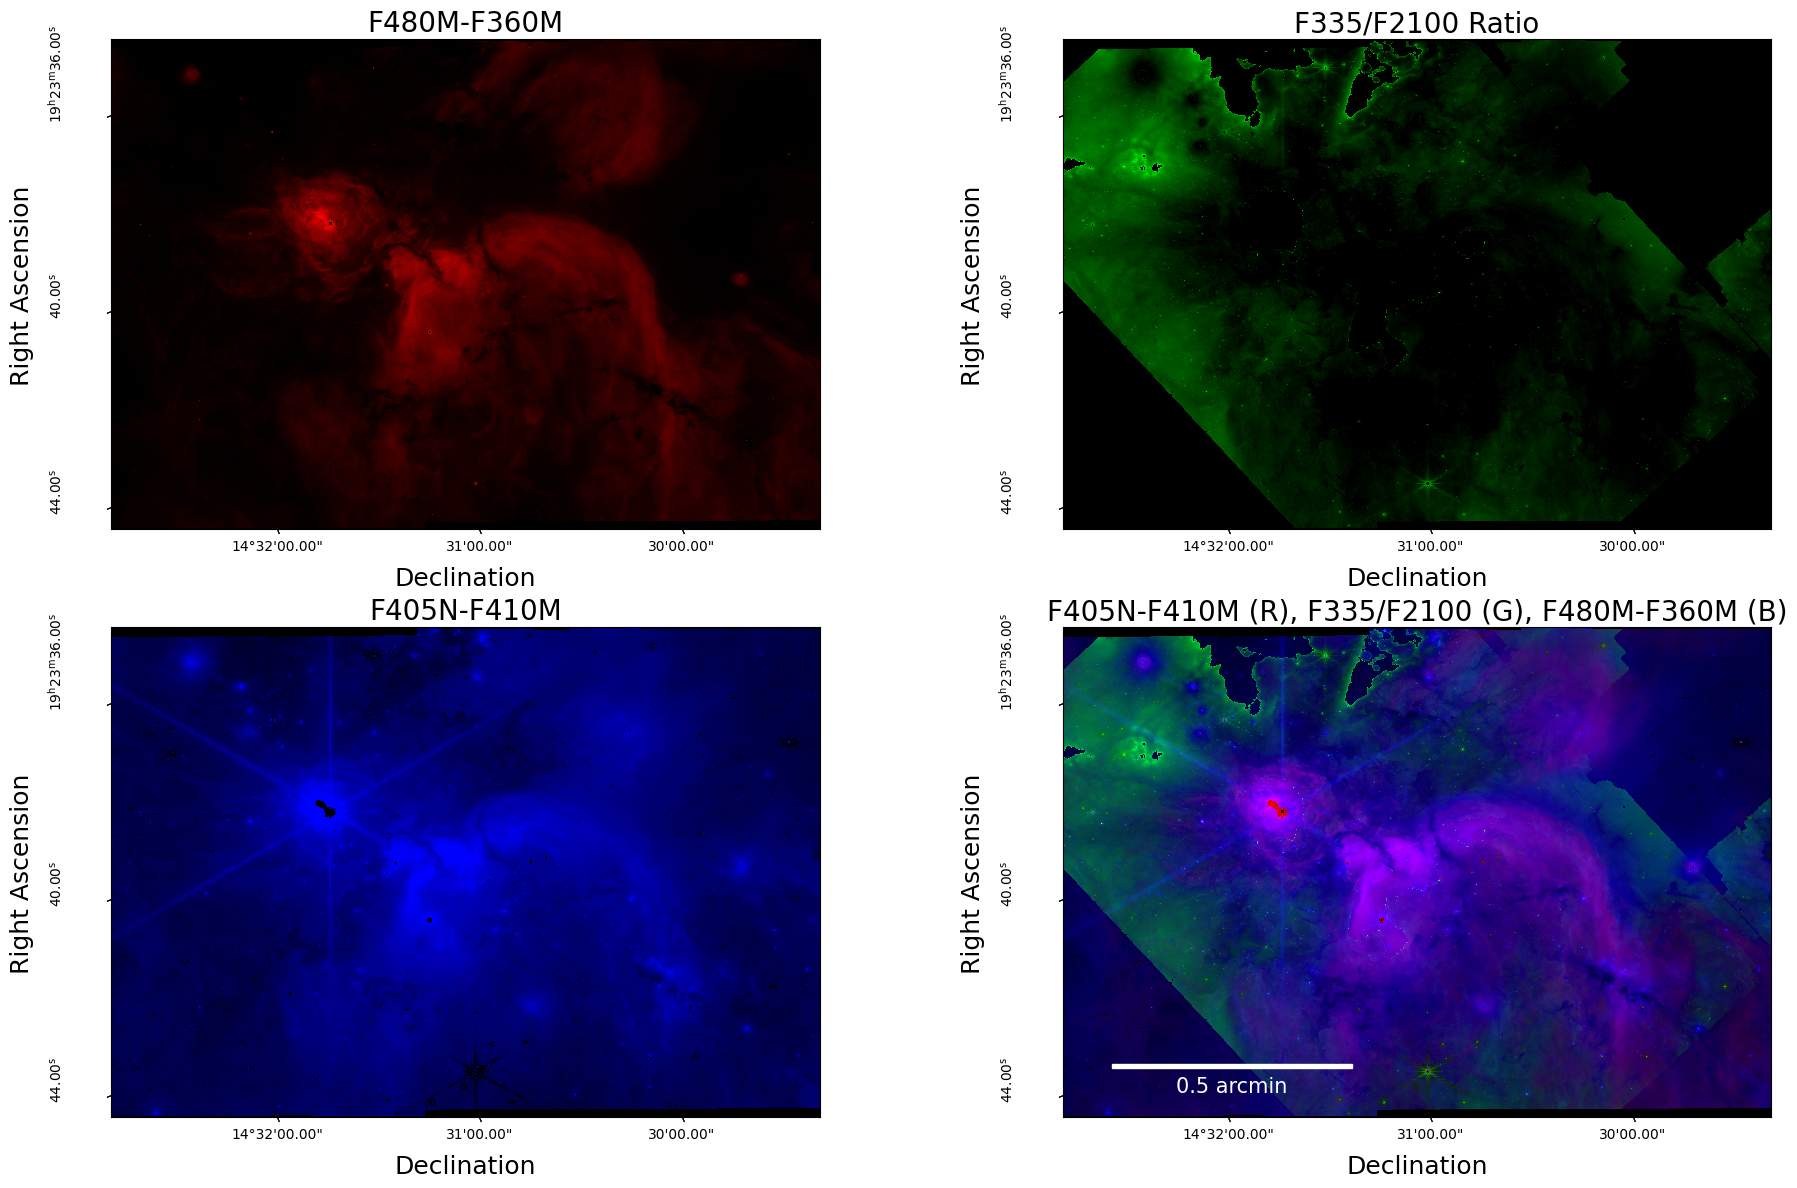

In [6]:

def add_scalebar(ax, xpos, ypos, length, pixel_scale, label=None, color='white', fontsize=20, pad=0.5, thickness=0.03):

    scaled_length = (length / pixel_scale).to(u.deg/u.deg)
    print(scaled_length)
    ax.add_patch(Rectangle((xpos, ypos), scaled_length.value, thickness * scaled_length.value, color=color))
    if label:
        ax.text(xpos + scaled_length.value / 2, ypos + pad * scaled_length.value, label, color=color, fontsize=fontsize, ha='center')

cutout_reg = Regions.read('/home/t.yoo/w51/w51_jwst_sources_highlight/regions/multiple_view.reg')[0]


img3 = f480_minus_f360.data
img2 = f335_f2100_ratio_reproj
img1 = f405_minus_f410_reproj

img1_cutout = Cutout2D(img1, cutout_reg.center, (cutout_reg.height, cutout_reg.width), wcs=WCS(f480_minus_f360.header, naxis=2))
img2_cutout = Cutout2D(img2, cutout_reg.center, (cutout_reg.height, cutout_reg.width), wcs=WCS(f480_minus_f360.header, naxis=2))
img3_cutout = Cutout2D(img3, cutout_reg.center, (cutout_reg.height, cutout_reg.width), wcs=WCS(f480_minus_f360.header, naxis=2))

vmin_img1 = 2.744981807184941
vmax_img1 = 46139.30524655213
vmin_img2 = 0.004656061913251089
vmax_img2 = 8.861745345761655
vmin_img3 = 0.00002
vmax_img3 = 475.5690074675649

img1 = img1_cutout.data
img2 = img2_cutout.data
img3 = img3_cutout.data

img1_wcs = img1_cutout.wcs
img2_wcs = img2_cutout.wcs
img3_wcs = img3_cutout.wcs

fig = plt.figure(figsize=(22.5,14))
ax1 = fig.add_subplot(221, projection=img1_cutout.wcs)
#ax1.imshow(f480_minus_f360.data, origin='lower', cmap='Blues', vmin=vmin_img3, vmax=vmax_img3)
ax1.set_title('F480M-F360M', fontsize=20)
ax2 = fig.add_subplot(222, projection=img2_cutout.wcs)
#ax2.imshow(f335_f2100_ratio_reproj, origin='lower', cmap='Greens', vmin=vmin_img2, vmax=vmax_img2)
ax2.set_title('F335/F2100 Ratio', fontsize=20)
ax3 = fig.add_subplot(223, projection=img3_cutout.wcs)
#ax3.imshow(f405_minus_f410_reproj, origin='lower', cmap='Reds', vmin=vmin_img1, vmax=vmax_img1)
ax3.set_title('F405N-F410M', fontsize=20)





ax4 = fig.add_subplot(224, projection=img3_cutout.wcs)
cmap1 = LinearSegmentedColormap.from_list('red', [(0, 0, 0), (1, 0, 0)])
cmap2 = LinearSegmentedColormap.from_list('green', [(0, 0, 0), (0, 1, 0)])
cmap3 = LinearSegmentedColormap.from_list('blue', [(0, 0, 0), (0, 0, 1)])

norm1 = simple_norm(img1, stretch='log', vmin=vmin_img1, vmax=vmax_img1)
norm2 = simple_norm(img2, stretch='log', vmin=vmin_img2, vmax=vmax_img2)
norm3 = simple_norm(img3, stretch='log', vmin=vmin_img3, vmax=vmax_img3)

alpha_red =1
alpha_green = 1
alpha_blue = 1
color1_rgb = cmap1(norm1(img1))[...,:3] * alpha_red
color2_rgb  = cmap2(norm2(img2))[...,:3]  * alpha_green
color3_rgb    = cmap3(norm3(img3))[...,:3]    * alpha_blue
composite = color1_rgb + color2_rgb + color3_rgb
composite = np.clip(composite, 0, 1)
ax4.imshow(composite, origin='lower', interpolation='none')
ax1.imshow(color1_rgb, origin='lower', interpolation='none')
ax2.imshow(color2_rgb, origin='lower', interpolation='none')
ax3.imshow(color3_rgb, origin='lower', interpolation='none')

ax4.set_title('F405N-F410M (R), F335/F2100 (G), F480M-F360M (B)', fontsize=20)
for ax in [ax1, ax2, ax3, ax4]:
    ra = lon = ax.coords['ra']
    dec = lat = ax.coords['dec']
    ra.set_major_formatter('hh:mm:ss.ss')
    dec.set_major_formatter('dd:mm:ss.ss')
    ra.set_axislabel('Right Ascension', fontsize=18)
    ra.set_ticklabel(rotation=90, pad=30)
    dec.set_axislabel('Declination', fontsize=18)

    ra.set_ticks_position('l')
    ra.set_ticklabel_position('l')
    ra.set_axislabel_position('l')
    dec.set_ticks_position('b')
    dec.set_ticklabel_position('b')
    dec.set_axislabel_position('b')
add_scalebar(ax4, 0.07*composite.shape[1], 0.1*composite.shape[0], 0.5*u.arcmin, img1_wcs.pixel_scale_matrix[0][0]*u.deg, label='0.5 arcmin', color='white', fontsize=15, pad=-0.1, thickness=0.02)
plt.savefig('plots/multiple_view.png', dpi=300, bbox_inches='tight')


In [7]:
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
from reproject import reproject_interp
from astropy.wcs import WCS
from matplotlib.colors import LinearSegmentedColormap
from astropy.visualization import simple_norm
import numpy as np
from matplotlib.patches import Rectangle
from regions import Regions
from astropy.nddata import Cutout2D
from reproject.mosaicking import find_optimal_celestial_wcs
f560w = fits.open('/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits')
f560w_wcs = WCS(f560w['SCI'].header, naxis=2)
f560w_image = f560w['SCI'].data.squeeze() 

f335_f2100_ratio_reproj, _ = reproject_interp((f335_f2100_ratio.data.squeeze(), WCS(f335_f2100_ratio.header, naxis=2)), f560w_wcs, shape_out=f560w_image.shape)
f405_minus_f410_reproj, _ = reproject_interp((f405_minus_f410.data.squeeze(), WCS(f405_minus_f410.header, naxis=2)), f560w_wcs, shape_out=f560w_image.shape)
f480_minus_f360_reproj, _ = reproject_interp((f480_minus_f360.data.squeeze(), WCS(f480_minus_f360.header, naxis=2)), f560w_wcs, shape_out=f560w_image.shape)


#plt.imshow(f335_f2100_ratio_reproj, origin='lower', cmap='Greens', norm=simple_norm(f335_f2100_ratio_reproj, stretch='log', vmin=0.0002, vmax=4.653733882294728))

Set OBSGEO-B to    -3.810003 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291940033.618 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.220310 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610512065.053 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


/scratch/local/10812130/ipykernel_3855838/1494336991.py:134: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax4.annotate('W51-IRS2', xy=(0.67, 0.35), xycoords='axes fraction', fontsize=20, color='white', ha='left', va='center',
/scratch/local/10812130/ipykernel_3855838/1494336991.py:137: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax4.annotate('W51-E', xy=(0.55, 0.67), xycoords='axes fraction', fontsize=20, color='w', ha='left', va='center',
/scratch/local/10812130/ipykernel_3855838/1494336991.py:139: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax4.annotate('W51b1', xy=(0.62, 0.08), xycoords='axes fraction', fontsize=20, color='w', ha='left', va='center',
/scratch/local/10812130/ipykernel_3855838/1494336991.py:141: Matplotl

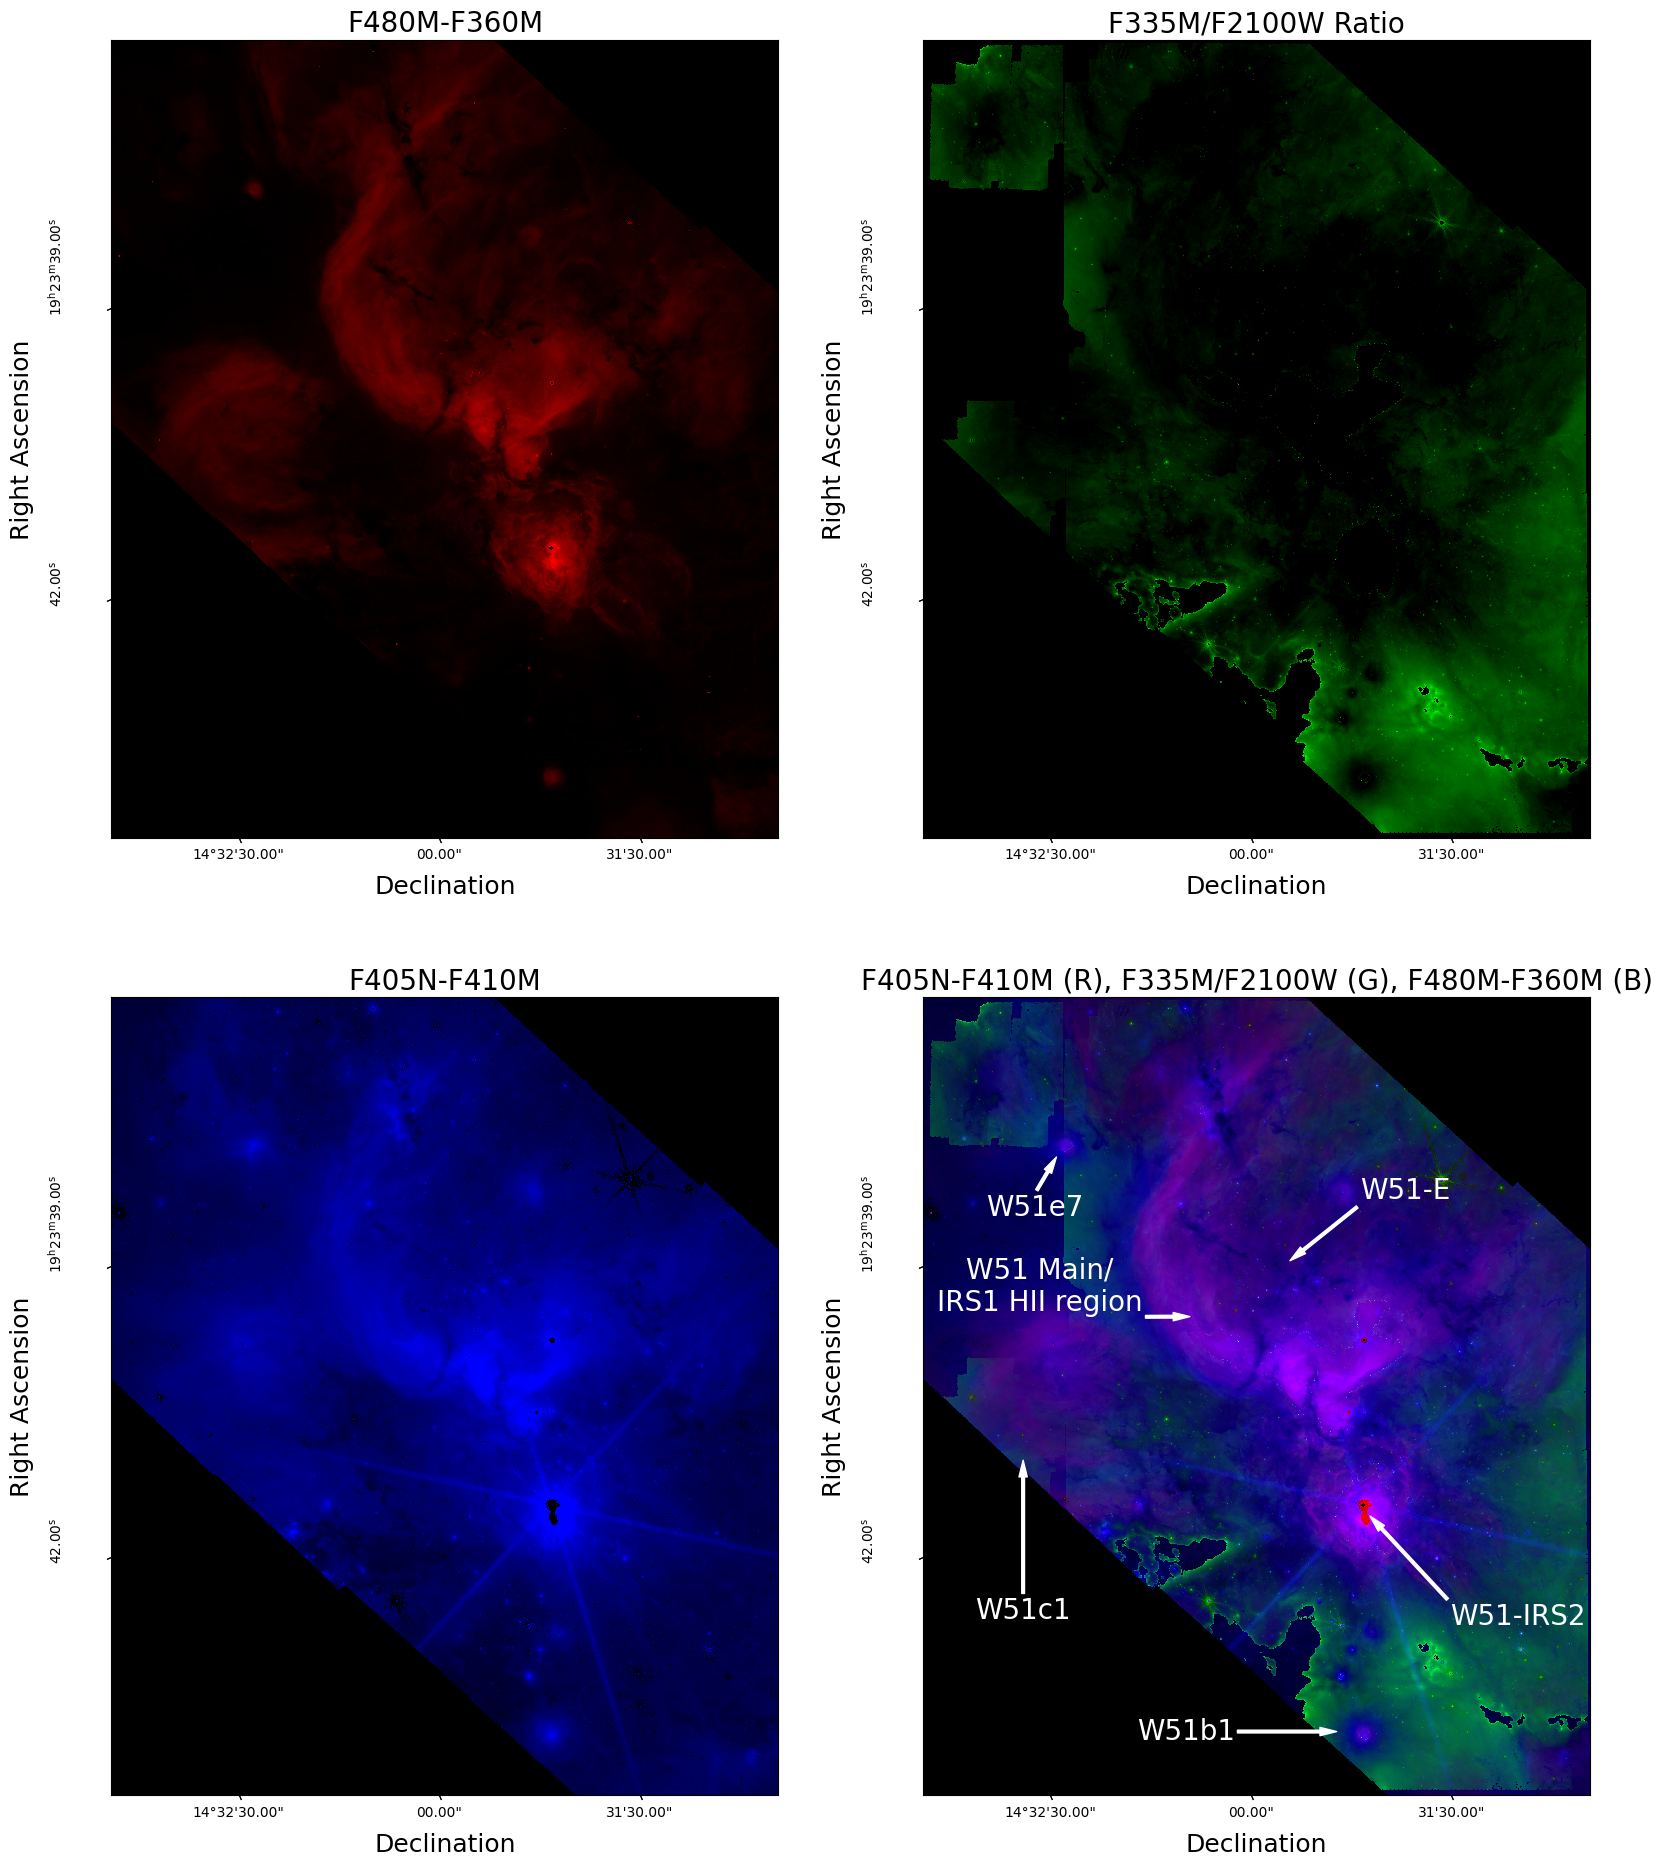

In [16]:

def add_scalebar(ax, xpos, ypos, length, pixel_scale, label=None, color='white', fontsize=20, pad=0.5, thickness=0.03):

    scaled_length = (length / pixel_scale).to(u.deg/u.deg)
    print(scaled_length)
    ax.add_patch(Rectangle((xpos, ypos), scaled_length.value, thickness * scaled_length.value, color=color))
    if label:
        ax.text(xpos + scaled_length.value / 2, ypos + pad * scaled_length.value, label, color=color, fontsize=fontsize, ha='center')


def draw_north_east_arrows(ax, wcs_header, arrow_start_pixel=(1000, 9000), fontsize=20):
    """
    Draws north and east arrows on the given axes using the provided WCS header.
    """


    # Compute a point 0.002 degrees north in sky coords
    sky_coord_start = wcs_header.pixel_to_world(*arrow_start_pixel)
    sky_coord_north = sky_coord_start.spherical_offsets_by(0*u.deg, 0.004*u.deg)  # 0.002 deg north

    # Convert back to pixel coordinates
    arrow_end_pixel = wcs_header.world_to_pixel(sky_coord_north)

    # Draw arrow
    print(arrow_end_pixel, arrow_start_pixel)
    ax.annotate(
        '', xy=arrow_end_pixel, xytext=arrow_start_pixel,
        arrowprops=dict( color='white', width=2,headwidth=6, frac=0.05, ec='w', fc='w'),
        xycoords='data'
    )

    # Label "North"
    ax.text(
        arrow_end_pixel[0] , arrow_end_pixel[1] + 200, 'North',
        color='white', fontsize=fontsize, ha='center', va='bottom'
    )

    # compute a point 0.002 degrees east in sky coords
    sky_coord_east = sky_coord_start.spherical_offsets_by(0.004*u.deg, 0*u.deg)  # 0.002 deg east
    arrow_end_east_pixel = wcs_header.world_to_pixel(sky_coord_east)
    # Draw east arrow
    ax.annotate(
        '', xy=arrow_end_east_pixel, xytext=arrow_start_pixel,
        arrowprops=dict( color='white', width=2,headwidth=6, frac=0.05, ec='w', fc='w'),
        xycoords='data'
    )
    # Label "East"
    ax.text(
        arrow_end_east_pixel[0] + 120, arrow_end_east_pixel[1]-150 , 'East',
        color='white', fontsize=fontsize, ha='left', va='center'
    )



cutout_reg = Regions.read('/home/t.yoo/w51/w51_jwst_sources_highlight/regions/multiple_view.reg')[0]


img3 = f480_minus_f360_reproj
img2 = f335_f2100_ratio_reproj
img1 = f405_minus_f410_reproj

#img1_cutout = Cutout2D(img1, cutout_reg.center, (cutout_reg.height, cutout_reg.width), wcs=WCS(f480_minus_f360.header, naxis=2))
#img2_cutout = Cutout2D(img2, cutout_reg.center, (cutout_reg.height, cutout_reg.width), wcs=WCS(f480_minus_f360.header, naxis=2))
#img3_cutout = Cutout2D(img3, cutout_reg.center, (cutout_reg.height, cutout_reg.width), wcs=WCS(f480_minus_f360.header, naxis=2))

vmin_img1 = 2.744981807184941
vmax_img1 = 46139.30524655213
vmin_img2 = 0.004656061913251089
vmax_img2 = 8.861745345761655
vmin_img3 = 0.00002
vmax_img3 = 475.5690074675649

#img1 = img1_cutout.data
#img2 = img2_cutout.data
#img3 = img3_cutout.data

#img1_wcs = img1_cutout.wcs
#img2_wcs = img2_cutout.wcs
#img3_wcs = img3_cutout.wcs
img1_wcs = img2_wcs = img3_wcs = f560w_wcs

fig = plt.figure(figsize=(32*0.6,38*0.6))
ax1 = fig.add_subplot(221, projection=img1_cutout.wcs)
#ax1.imshow(f480_minus_f360.data, origin='lower', cmap='Blues', vmin=vmin_img3, vmax=vmax_img3)
ax1.set_title('F480M-F360M', fontsize=20)
ax2 = fig.add_subplot(222, projection=img2_cutout.wcs)
#ax2.imshow(f335_f2100_ratio_reproj, origin='lower', cmap='Greens', vmin=vmin_img2, vmax=vmax_img2)
ax2.set_title('F335M/F2100W Ratio', fontsize=20)
ax3 = fig.add_subplot(223, projection=img3_cutout.wcs)
#ax3.imshow(f405_minus_f410_reproj, origin='lower', cmap='Reds', vmin=vmin_img1, vmax=vmax_img1)
ax3.set_title('F405N-F410M', fontsize=20)





ax4 = fig.add_subplot(224, projection=img3_cutout.wcs)
cmap1 = LinearSegmentedColormap.from_list('red', [(0, 0, 0), (1, 0, 0)])
cmap2 = LinearSegmentedColormap.from_list('green', [(0, 0, 0), (0, 1, 0)])
cmap3 = LinearSegmentedColormap.from_list('blue', [(0, 0, 0), (0, 0, 1)])

norm1 = simple_norm(img1, stretch='log', vmin=vmin_img1, vmax=vmax_img1)
norm2 = simple_norm(img2, stretch='log', vmin=vmin_img2, vmax=vmax_img2)
norm3 = simple_norm(img3, stretch='log', vmin=vmin_img3, vmax=vmax_img3)

alpha_red =1
alpha_green = 1
alpha_blue = 1
color1_rgb = cmap1(norm1(img1))[...,:3] * alpha_red
color2_rgb  = cmap2(norm2(img2))[...,:3]  * alpha_green
color3_rgb    = cmap3(norm3(img3))[...,:3]    * alpha_blue
composite = color1_rgb + color2_rgb + color3_rgb
composite = np.clip(composite, 0, 1)
ax4.imshow(composite, origin='lower', interpolation='none')
ax1.imshow(color1_rgb, origin='lower', interpolation='none')
ax2.imshow(color2_rgb, origin='lower', interpolation='none')
ax3.imshow(color3_rgb, origin='lower', interpolation='none')

ax4.set_title('F405N-F410M (R), F335M/F2100W (G), F480M-F360M (B)', fontsize=20)
for ax in [ax1, ax2, ax3, ax4]:
    ra = lon = ax.coords['ra']
    dec = lat = ax.coords['dec']
    ra.set_major_formatter('hh:mm:ss.ss')
    dec.set_major_formatter('dd:mm:ss.ss')
    ra.set_axislabel('Right Ascension', fontsize=18)
    ra.set_ticklabel(rotation=90, pad=30)
    dec.set_axislabel('Declination', fontsize=18)

    ra.set_ticks_position('l')
    ra.set_ticklabel_position('l')
    ra.set_axislabel_position('l')
    dec.set_ticks_position('b')
    dec.set_ticklabel_position('b')
    dec.set_axislabel_position('b')
ax4.annotate('W51-IRS2', xy=(0.67, 0.35), xycoords='axes fraction', fontsize=20, color='white', ha='left', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, frac=0.07, ec='white', fc='white'), textcoords='offset pixels', xytext=(80,-100))

ax4.annotate('W51-E', xy=(0.55, 0.67), xycoords='axes fraction', fontsize=20, color='w', ha='left', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, frac=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(70,70))
ax4.annotate('W51b1', xy=(0.62, 0.08), xycoords='axes fraction', fontsize=20, color='w', ha='left', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, frac=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(-200,0))
ax4.annotate('W51c1', xy=(0.15, 0.42), xycoords='axes fraction', fontsize=20, color='w', ha='center', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, frac=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(0, -150))
ax4.annotate('W51e7', xy=(0.2, 0.8), xycoords='axes fraction', fontsize=20, color='w', ha='left', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, frac=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(-70,-50))
ax4.annotate('W51 Main/\nIRS1 HII region', xy=(0.4, 0.6), xycoords='axes fraction', fontsize=20, color='w', ha='center', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, frac=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(-150,30))
plt.savefig('plots/multiple_view.png', bbox_inches='tight',)
